In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import numpy as np

In [3]:
crea=pd.read_csv('crea.csv')
crea.set_index('id', drop=True, inplace=True)

In [4]:
crea.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ormudle,0.367454,0.436923,0.974487,0.525842,0.878192,0.184003,0.747011,0.944775,0.298686,0.566660,0.551993,0.290215,0.011001,0.837059,0.717825,0.205775,0.526781,0.416974,0.238311,0.550765,0.451179,0.829390,0.586738,0.593246,0.402034,0.874278,0.226655,0.284798,0.077177,0.806874,0.338812,0.029836,0.892876,0.163166,0.685134,0.695088,0.805664,0.537189,0.167033,0.479054,0.070310,0.290370,0.753967,0.141587,0.162820,0.799166,0.123341,0.381881,0.299717,0.049174,0.813049,0.851584,0.990959,0.232900,0.515224,0.036716,0.287177,0.338955,0.878650,0.590075,0.433448,0.775269,0.540849,0.137148,0.088828,0.459432,0.593318,0.059518,0.614644,0.012647,0.478181,0.692023,0.028398,0.625904,0.773102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zcrlcyn,0.531631,0.556012,0.697414,0.654986,0.339991,0.448421,0.268383,0.160874,0.215244,0.877009,0.376507,0.729172,0.473830,0.994056,0.685923,0.741599,0.154719,0.574069,0.003692,0.804729,0.063216,0.885333,0.217034,0.509366,0.833486,0.386625,0.954279,0.725025,0.295605,0.555927,0.306903,0.677030,0.458921,0.701996,0.180541,0.132072,0.560295,0.312456,0.576544,0.006895,0.419998,0.810774,0.833631,0.028828,0.219509,0.708551,0.414135,0.451578,0.132557,0.201290,0.380852,0.736636,0.621406,0.802086,0.246146,0.833783,0.016154,0.155266,0.109371,0.946325,0.757021,0.426103,0.368981,0.257288,0.167348,0.373965,0.053192,0.539722,0.622325,0.635603,0.090775,0.267540,0.707074,0.058165,0.961721,0.910195,0.475716,0.492148,0.888143,0.807868,0.722598,0.556515,0.572608,0.057103,0.777348,0.627929,0.739134,0.828719,0.417237,0.257877,0.954253,0.761122,0.029321,0.705256,0.369005,0.334859,0.836867,0.183631,0.930612,0.047071,0.559064,0.977034,0.805395,0.202038,0.147887,0.846173,0.172749,0.494036,0.256292,0.452587,0.13587,0.096584,0.035019,0.247197,0.572404,0.330176,0.553447,0.439917,0.628172,0.678543,0.262638,0.708008,0.336086,0.776076,0.389928,0.576605,0.061369,0.615405,0.318293,0.983588,0.854333,0.767525,0.995559,0.465641,0.425297,0.139442,0.397234,0.169909,0.136622,0.335183,0.091014,0.792356,0.412635,0.924201,0.205336,0.529801,0.127095,0.055871,0.173368,0.988493,0.305652,0.90531,0.503924,0.717383,0.708191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fbquiny,0.353315,0.259335,0.610632,0.249300,0.447652,0.396109,0.810311,0.700942,0.086565,0.038308,0.904487,0.602517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [5]:
def dropnan(x):
    return x[np.isfinite(x)]

def get_xy(x):
    y=dropnan(x)
    x=np.arange(len(y))
    return x,y

def get_trend(y,return_scalar=True):
    x=np.arange(len(y))
    z=np.polyfit(x,y,1)
    p=np.poly1d(z)
    if return_scalar:
        return p[1]
    else:
        return p


def overlaps(windows):
    r=[(i-20,i) for i in windows]
    b = []
    for begin,end in sorted(r):
        if b and b[-1][1] >= begin - 1:
            b[-1][1] = max(b[-1][1], end)
        else:
            b.append([begin, end])
    return b

def len_and_change(ranges,y):

    lenghts=[]
    changes=[]

    for r in ranges:
        start_i=r[0]
        end_i=r[1]
        start=y[start_i]
        end=y[end_i]
        leni=end_i-start_i
        change=end-start
        lenghts.append(leni)
        changes.append(change)
    
    return lenghts,changes

In [6]:
i=crea.index[0]
pat=crea.loc['zcrlcyn']

In [7]:


def change_pat(pat,window_size,thresh_dir,thresh,plot):

    x,y=get_xy(pat.values)
    if plot:
        p=get_trend(y,return_scalar=False)
        plt.plot(x,p(x), 'g--')

    if plot:
        plt.plot(x,y)

    window_trends=pd.Series(y).rolling(window_size).apply(lambda x:get_trend(x))

    windows=[]
    mid_range=np.mean([y.max(), y.min()])/1.5
    shift=(y.max()-y.min())/400

    for i,win in enumerate(window_trends):
        if thresh_dir=='larger':
            if win>thresh:
                windows.append(i)
                if plot:
                    plt.axhline(y=mid_range+(i*shift), xmin=((i-20)/len(window_trends)), xmax=i/len(window_trends),color='r')
        else:
             if win<thresh:
                windows.append(i)
                if plot:
                    plt.axhline(y=mid_range+(i*shift), xmin=((i-20)/len(window_trends)), xmax=i/len(window_trends),color='r')

    if len(windows)==0:
        change_bool=0
        mean_change=0
        total_lenght=0
        return change_bool,mean_change,total_lenght
    else:
        change_bool=1

        ranges=overlaps(windows)   
        lenghts,changes=len_and_change(ranges,y)      
        
        mean_change=np.average(changes, weights=lenghts)
        total_lenght=sum(lenghts)
        return change_bool,mean_change,total_lenght

In [8]:


def windows_trend(pat,window_size,thresh_dir):

    x,y=get_xy(pat.values)  

    window_trends=pd.Series(y).rolling(window_size).apply(lambda x:get_trend(x))

    if thresh_dir=='larger':
    
        return window_trends[window_trends>0].mean()
    
    else:
        return window_trends[window_trends<0].mean()

In [9]:
results=pd.DataFrame()
for pat in crea.index:
    pati=crea.loc[pat]    
    change_bool,mean_change,total_lenght=change_pat(pati, window_size=20,thresh_dir='larger',thresh=0.01,plot=False)
    results=results.append({'id':pat,'change_bool':change_bool,'mean_change':mean_change,'total_lenght':total_lenght},ignore_index=True)

(1, 0.3591727353989691, 134)

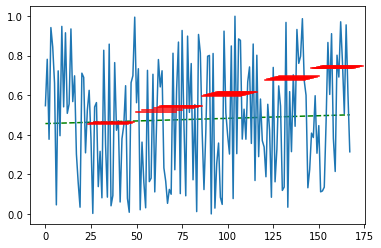

In [10]:
pat=crea.loc['hngsabv']
change_pat(pat, window_size=20,thresh_dir='larger',thresh=0.01,plot=True)

In [11]:
pat=crea.loc['ormudle']
g=windows_trend(pat, window_size=20, thresh_dir='larger')
g

0.00527310804123377

In [12]:
res=pd.DataFrame({'id':crea.index})
windos=[15,20]
for window_size in windos:
    temp=crea.apply(lambda x: windows_trend(x, window_size, thresh_dir='larger'), axis=1, result_type='expand').reset_index().rename(columns={0:window_size})
    res=res.merge(temp, on='id', how='outer')

In [13]:
res.describe()

,15,20
count,91.000000,90.000000
mean,0.014164,0.008972
std,0.003093,0.002897
min,0.004106,0.000884
25%,0.012107,0.007485
50%,0.014301,0.008972
75%,0.016045,0.010465
max,0.022033,0.022586


In [ ]:

def pat_trends(pat,window_size,thresh_up, thresh_down,plot):

    x,y=get_xy(pat.values)
    if plot:
        p=get_trend(y,return_scalar=False)
        plt.plot(x,p(x), 'g--')

    if plot:
        plt.plot(x,y)

    window_trends=pd.Series(y).rolling(window_size).apply(lambda x:get_trend(x))

    windows=[]
    mid_range=np.mean([y.max(), y.min()])/1.5
    shift=(y.max()-y.min())/400

    for i,win in enumerate(window_trends):
        if thresh_dir=='larger':
            if win>thresh:
                windows.append(i)
                if plot:
                    plt.axhline(y=mid_range+(i*shift), xmin=((i-20)/len(window_trends)), xmax=i/len(window_trends),color='r')
        else:
             if win<thresh:
                windows.append(i)
                if plot:
                    plt.axhline(y=mid_range+(i*shift), xmin=((i-20)/len(window_trends)), xmax=i/len(window_trends),color='r')

    if len(windows)==0:
        change_bool=0
        mean_change=0
        total_lenght=0
        return change_bool,mean_change,total_lenght
    else:
        change_bool=1

        ranges=overlaps(windows)   
        lenghts,changes=len_and_change(ranges,y)      
        
        mean_change=np.average(changes, weights=lenghts)
        total_lenght=sum(lenghts)
        return change_bool,mean_change,total_lenght